# ST447 - Exercise 2

## Question 1

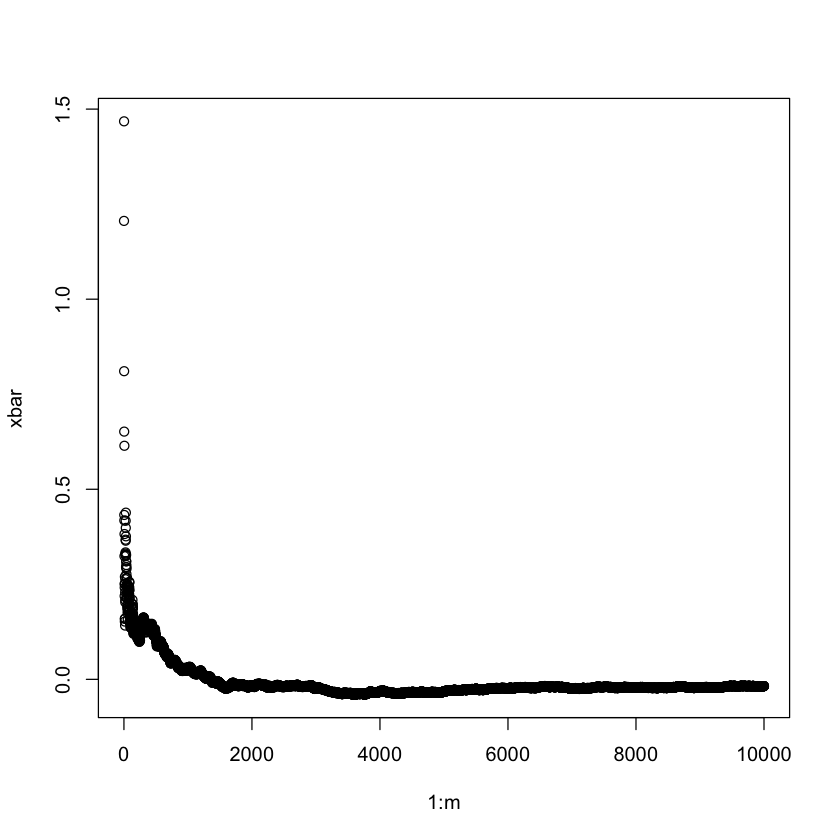

In [7]:
m <- 10000

sample <- rnorm(m)
xbar <- cumsum(sample) / (1:m)
plot(1:m, xbar)

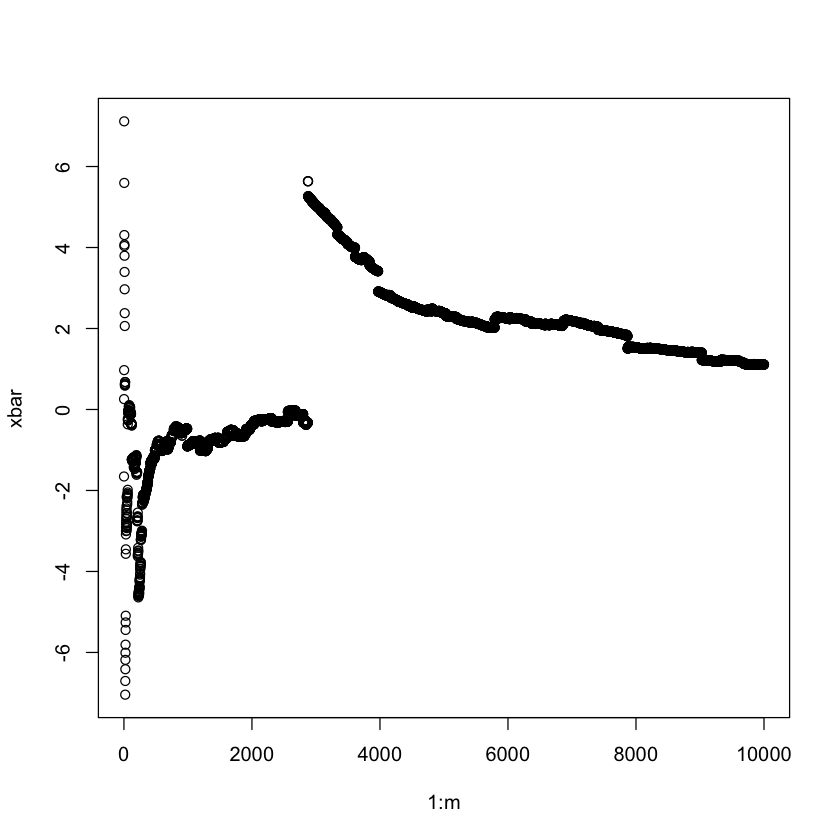

In [8]:
sample <- rcauchy(m)
xbar <- cumsum(sample) / (1:m)
plot(1:m, xbar)

The normal distribution quite quickly converges to zero. By central limit theorem, the mean goes to zero and standard deviation of the mean is proportional to $1/\sqrt{n}$, so this makes sense. The Cauchy distribution has an undefined expected value, so the mean does not converge.

## Question 2

### Part a
$F_{Y_1}(y) = \mathbb{P}[Y_1 \leq y] = \mathbb{P}[X_i \leq y \: \forall \: X_i] = \mathbb{P}[X_i \leq y]^n = F(y)^n$ where $F(y) = \int_{-\infty}^y f(x) dx$ and $F'(y) = f(y)$.

$f_{Y_1}(y) = F_{Y_1}'(y) = nF(y)^{n-1}F'(y) = \boxed{nf(y)\left(\int_{-\infty}^y f(x) dx\right)^{n-1}}$

### Part b
$F_{Y_2}(y) = \mathbb{P}[Y_2 \leq y] = 1 - \mathbb{P}[Y_2 > y] = 1 - \mathbb{P}[X_i > y \: \forall \: X_i] = 1 - \mathbb{P}[X_i > y]^n = 1 - (1 - F(y))^n$.

$f_{Y_2}(y) = F_{Y_2}'(y) = n(1 - F(y))^{n-1}F'(y) = \boxed{nf(y)\left(\int_y^{\infty} f(x) dx\right)^{n-1}}$

## Question 3

### Part a
$F_Y(y) = \mathbb{P}[Y \leq y] = \mathbb{P}[F(X) \leq y] = \mathbb{P}[X \leq F^{-1}(y)] = F(F^{-1}(y)) = y$ iff $y \in [0, 1]$.

$Y \sim \textrm{U}(0, 1) \Rightarrow f_Y(y) =
\begin{cases}
    1 & 0 \leq y \leq 1 \\
    0 & \textrm{otherwise}
\end{cases}$

### Part b
$V = F^{-1}(U) \Rightarrow U = F(V) \Rightarrow F(V) \sim \textrm{U}(0, 1)$ and $Y = F(X) \sim \textrm{U}(0, 1)$

$\therefore F(V) \sim F(X) \Rightarrow V \sim X$.

### Part c
$f(x) = \begin{cases}
    1/4 & x \in (-1, 0] \cup (1, 2) \\
    1/2 & x \in (0, 1] \\
    0 & \textrm{otherwise}
\end{cases} \Rightarrow F(x) = \int_{\infty}^x f(t) dt = \begin{cases}
    0 & x < -1 \\
    x/4 + 1/4 & -1 \leq x < 0 \\
    x/2 + 1/4 & 0 \leq x < 1 \\
    x/4 + 1/2 & 1 \leq x < 2 \\
    1 & 2 \leq x
\end{cases} \Rightarrow F^{-1}(x) = \begin{cases}
    4x - 1 & 0 \leq x < 1/4 \\
    2x - 1/2 & 1/4 \leq x < 3/4 \\
    4x - 2 & 3/4 \leq x \leq 1
\end{cases}$

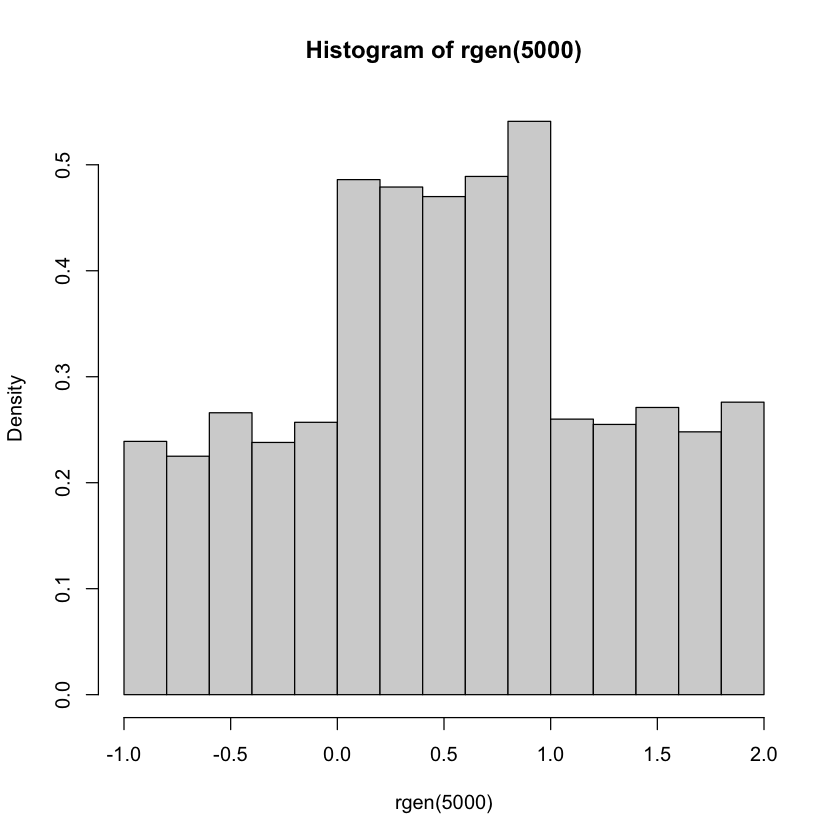

In [9]:
rgen <- function(n) {
    x <- runif(n)
    return(ifelse(x < 0.25, 4*x - 1, ifelse(x < 0.75, 2*x - 0.5, 4*x - 2)))
}

hist(rgen(5000), prob = TRUE)

## Question 4

In [10]:
area <- function(n, a, b) {
    x <- runif(n, 0, a)
    y <- runif(n, 0, b)
    return(4 * a * b * mean((x/a)^2 + (y/b)^2 <= 1))
}

$$\hat{A} = 4abn^{-1}\sum 1[(x_i/a)^2 + (y_i/b)^2 \leq 1]$$
$$\textrm{SE}(\hat{A})^2 = (4ab/n)^2\sum \textrm{SE}(1[(x_i/a)^2 + (y_i/b)^2 \leq 1])^2$$
$$ = (4ab/n)^2 \sum \mathbb{P}[(x_i/a)^2 + (y_i/b)^2 \leq 1](1-\mathbb{P}[(x_i/a)^2 + (y_i/b)^2 \leq 1])$$

Our estimate $\hat{A}$ is the area of the rectangle containing the ellipse $4ab$ times $\mathbb{P}[(x_i/a)^2 + (y_i/b)^2 \leq 1]$, so $\hat{A} / 4ab = \mathbb{P}[(x_i/a)^2 + (y_i/b)^2 \leq 1]$.
$$\textrm{SE}(\hat{A})^2 = (4ab/n)^2 \sum (\hat{A} / 4ab)(1-\hat{A} / 4ab) = \hat{A}(4ab - \hat{A}) / n$$
$$\boxed{\textrm{SE}(\hat{A}) = [\hat{A}(4ab - \hat{A}) / n]^{1/2}}$$

## Question 5

### Part a

In [11]:
mc_int <- function(sample, h) {
    integrand <- h(sample)
    m <- mean(integrand)
    s <- sqrt(mean((h(sample) - m)^2) / (n - 1))
    return(list(m, s))
}

n <- 10000000
sample <- runif(n, -2, 3)
h <- function(x) { 5 * (x^3 + log(1 + x^2)) / (2 + cos(x)) }
res <- mc_int(sample, h)

message("Mean: ", res[1])
message("Std Error: ", res[2])

Mean: 17.0735090505676

Std Error: 0.0110839487684902



### Part b

In [12]:
sample <- rexp(n)
h <- function(x) { sin(x^3 + 1/sqrt(x)) }
res <- mc_int(sample, h)

message("Mean: ", res[1])
message("Std Error: ", res[2])

Mean: 0.459486254194832

Std Error: 0.000213466234722981



### Part c

$$\int_{-\infty}^{\infty} \exp(\sin(x) - (x-2)^2)dx = \int_{-\infty}^{\infty} \exp(\sin(x))\exp(-(x-2)^2)dx = \int_{-\infty}^{\infty} \sqrt{1/2*2\pi}\exp(\sin(x))\frac{1}{\sqrt{1/2*2\pi}}\exp(-(x-2)^2/(2*1/2))dx$$
$$ = \int_{-\infty}^{\infty} \sqrt{\pi} \exp(\sin(x)) f_{\mathcal{N}(2, 1/2)}(x) dx$$

In [13]:
sample <- rnorm(n, 2, sqrt(2)/2)
h <- function(x) { sqrt(pi) * exp(sin(x)) }
res <- mc_int(sample, h)

message("Mean: ", res[1])
message("Std Error: ", res[2])

Mean: 3.78086392842625

Std Error: 0.000320002543417818



## Question 6

Mean: 53.4747458589801

Std dev: 17.5576541083369



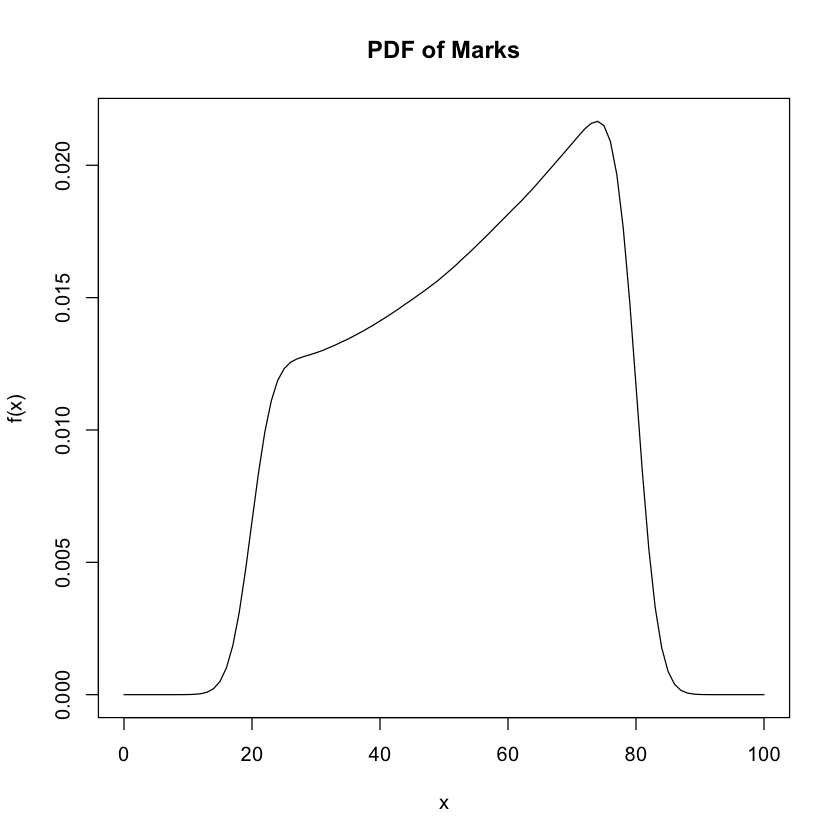

In [14]:
n <- 1000000

u <- runif(n, 0, 1)
x <- exp(u + 1/(1 + sqrt(u)))
x <- x / mean(x)
sample <- rnorm(n, 20 + 60*u, sqrt(10/(1 + u^2)))

m <- mean(sample * x)
s <- sqrt(sum((sample - m)^2 * x) / (n-1))
pdf <- function(y) {
    outer(y, 20 + 60*u, dnorm, sd = sqrt(10/(1 + u^2))) %*% x / n
}

message("Mean: ", m)
message("Std dev: ", s)

marks <- 0:100
plot(
    marks,
    pdf(marks),
    type = "l",
    main = "PDF of Marks",
    xlab = "x",
    ylab = "f(x)"
)

## Question 7

Let $R(x) \equiv f_X(x) / Mp(x)$.

$$\mathbb{P}[X_0 \in A | U \leq R(X_0)] = \frac{\mathbb{P}[X_0 \in A \land U \leq R(X_0)]}{\mathbb{P}[U \leq R(X_0)]}$$
$$\mathbb{P}[X_0 \in A \land U \leq R(X_0)] = \int_X p(x)dx \int_0^1 du 1[x \in A \land u \leq R(x)] = \int_X p(x)dx 1[x \in A] \int_0^1 du 1[u \leq R(x)] = \int_A p(x)dx R(x)$$
$$ = \int_A dx p(x) * f_X(x) / Mp(x) = M^{-1} \int_A f_X(x) dx$$
$$\mathbb{P}[U \leq R(X_0)] = \int_X p(x)dx \int_0^1 du 1[u \leq R(x)] = \int_X p(x) dx R(x) = \int_X dx p(x) * f_X(x) / Mp(x) = M^{-1} \int_X f_X(x) dx = M^{-1}$$
$$\therefore \mathbb{P}[X_0 \in A | U \leq R(X_0)] = \int_A f_X(x) dx

## Question 8

### Part a
To get $\nu^*$, we should compute the bootstrap estimates $\theta^*_i$ for $\hat{\theta}$ (as in part b), and then compute $\nu^*$ the sample variance of the $\theta^*_i$.
$$ \nu^* = (B-1)^{-1} \sum (\theta^*_i - \bar{\theta}^*)^2$$

### Part b

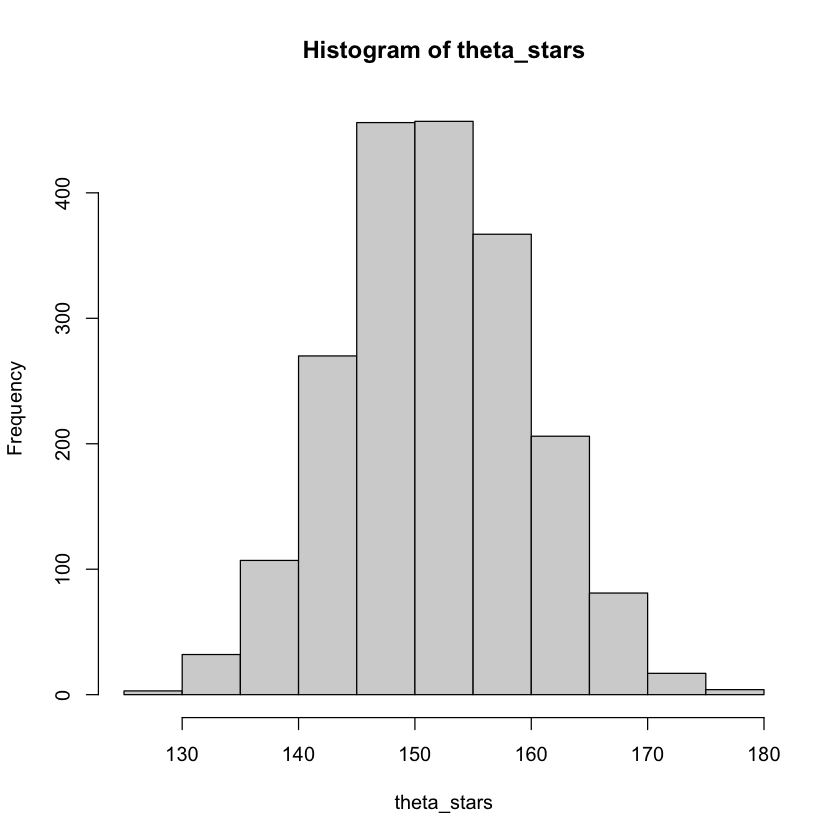

In [15]:
n <- 400
mu <- 5
s <- 1
B <- 2000

X <- rnorm(n, mu, s)

boots <- matrix(sample(X, n*B, TRUE), nrow = B, ncol = n)
theta_stars <- exp(apply(boots, 1, mean))

hist(theta_stars)

### Part c

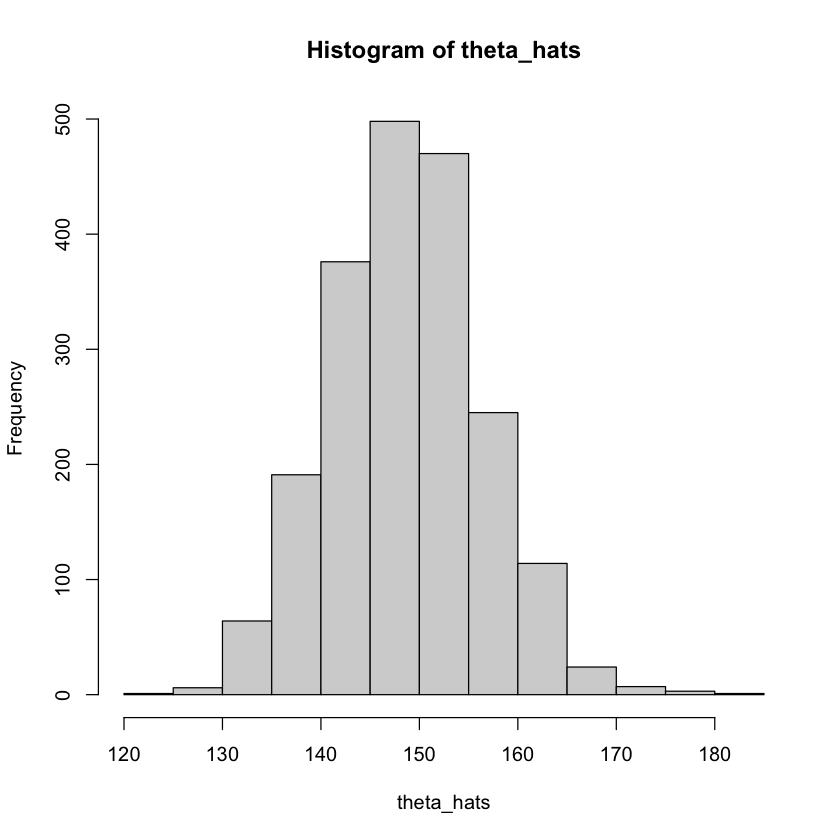

In [16]:
samples <- matrix(rnorm(n*B, mu, s), nrow = B, ncol = n)
theta_hats <- exp(apply(samples, 1, mean))

hist(theta_hats)

The distributions in part b and part c are indistinguishable.

## Question 9

### Part a
We shoud do this...

### Part b

In [17]:
m <- 500
n <- 100
B <- 200
mu <- 1
s <- 1

contains <- c(0, 0, 0)
for (i in 1:m) {
    Y <- rnorm(n, mu, s)
    theta_hat <- mean(Y) / sqrt(var(Y))
    boots <- matrix(sample(Y, n*B, replace = TRUE), nrow = B, ncol = n)
    theta_stars <- apply(boots, 1, mean) / sqrt(apply(boots, 1, var))

    # Approximate normal interval.
    tau_std <- sqrt(var(theta_stars))
    ci_ani <- theta_hat + 2*c(-tau_std, tau_std)

    # Percentile interval.
    ci_peri <- quantile(theta_stars, c(0.025, 0.975), names = FALSE)

    # Pivotal interval.
    ci_pivi <- 2*theta_hat - c(ci_peri[2], ci_peri[1])

    contains <- contains + c(
        ci_ani[1] <= mu/s & mu/s <= ci_ani[2],
        ci_pivi[1] <= mu/s & mu/s <= ci_pivi[2],
        ci_peri[1] <= mu/s & mu/s <= ci_peri[2]
    )/m
}

message("Approximate normal interval: ", contains[1])
message("Pivotal interval: ", contains[2])
message("Percentile interval: ", contains[3])

Approximate normal interval: 0.954000000000001

Pivotal interval: 0.942000000000001

Percentile interval: 0.930000000000001

